In [12]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import brentq as br

In [13]:
data=pd.read_excel('oil3.xlsx')
kij=pd.read_excel('BIPs.xlsx')
Pg=pd.read_excel('pres.xlsx')

In [14]:
T=data['T'][0] # reservoir temperature
R=8.314472*10**(-5) #m3*bar/mol*K
Tc=np.array(data['Tc'])
Pc=np.array(data['Pc'])
w=np.array(data['w'])
z=np.array(data['z'])
P=np.array(Pg['P'])
vexp=np.array(Pg['Vexp'])
aL=pd.DataFrame(np.zeros((len(Tc),len(Tc))))
aV=pd.DataFrame(np.zeros((len(Tc),len(Tc))))

In [15]:
#Import shift volume parameters
s=[0,0,-0.154,-0.1002,-0.08501,-0.07935,-0.06413,-0.0435,-0.04183,0.153896837]

In [16]:
#reservoir conditions
ZLr=[]
ZVr=[]
Vr=[]
Lr=[]
VL=[]
VV=[]
VLcor=[]
VVcor=[]
sumcor=[]
vvcor=[]
Pb=195.486 #from bubble point code
n1=0
for r in range (0,len(P)):
    if P[r]>Pb:
        a=[]
        b=[]
        α=[]
        cor1=[]
        for i in range (0,len(w)):
            b=np.append(b,(z[i]*0.0778*R*Tc[i])/Pc[i])
            cor1=np.append(cor1,s[i]*b[i])
            if w[i]<=0.491:
                m=0.37464+1.54226*w[i]-0.26992*w[i]*w[i]
                α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
            else:
                m=0.379642+1.48503*w[i]-0.164423*w[i]*w[i]+0.016666*w[i]*w[i]*w[i]
                α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
        for i in range (0,len(Tc)): 
            for j in range(0,len(Tc)):
                a=np.append(a,z[i]*z[j]*(1-kij.iat[i,j])*math.sqrt(α[i]*α[j]))
        sumcor=np.append(sumcor,sum(cor1))
        vvcor=np.append(vvcor,0)
        am=np.sum(a)
        bm=np.sum(b)
        A=(am*P[r])/(R*R*T*T)
        B=(bm*P[r])/(R*T)
        Zro=np.array([1,B-1,A-2*B-3*(B*B),(B**3)+(B**2)-A*B])
        Zro=np.roots(Zro)
        Real=[]
        for i in range(len(Zro)):
            if abs(Zro[i].imag)<10**(-5):
                Real=np.append(Real, np.real(Zro[i]))
        ZL=min(Real)
        ZV=0
        V=0
    else:
        
        n=0
        SSF=5
        while SSF>10**(-15):
            if n<=0:
                Vo=0
                K=[]
                for i in range (0,len(Tc)):
                    K=np.append(K,(Pc[i]/P[r])*math.exp(5.37*(1+w[i])*(1-Tc[i]/T))) #estimating K values from Wilson's Correlation
                def f(Vo):
                    return sum(z*(K-1)/(1+Vo*(K-1)))
                V=br(f,0,1)
                x=[]
                y=[]
                for i in range (0,len(Tc)):
                    x=np.append(x,z[i]/(1+V*(K[i]-1)))
                    y=np.append(y,z[i]*K[i]/(1+V*(K[i]-1)))
            else:
                Vo=V
                K=[]
                for i in range (0,len(Tc)):
                    K=np.append(K,φLi[i]/φVi[i])
                def f(Vo):
                    return sum(z*(K-1)/(1+Vo*(K-1)))
                V=br(f,0,1)
                x=[]
                y=[]
                for i in range (0,len(Tc)):
                    x=np.append(x,z[i]/(1+V*(K[i]-1)))
                    y=np.append(y,z[i]*K[i]/(1+V*(K[i]-1)))
            α=[]
            bLi=[]
            bL=[]
            bVi=[]
            bV=[]
            cor2=[]
            cor3=[]
            for i in range (0,len(Tc)):  
                bLi=np.append(bLi,(0.0778*R*Tc[i])/Pc[i])
                bVi=np.append(bVi,(0.0778*R*Tc[i])/Pc[i])
                bL=np.append(bL,x[i]*bLi[i])
                bV=np.append(bV,y[i]*bVi[i])
                cor2=np.append(cor2,s[i]*bLi[i]*x[i])
                cor3=np.append(cor3,s[i]*bVi[i]*y[i])
                if w[i]<=0.491:
                    m=0.37464+1.54226*w[i]-0.26992*w[i]*w[i]
                    α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
                else:
                    m=0.379642+1.48503*w[i]-0.164423*w[i]*w[i]+0.016666*w[i]*w[i]*w[i]
                    α=np.append(α,(1/Pc[i])*0.45724*(R*R)*(Tc[i]*Tc[i])*(1+m*(1-math.sqrt(T/Tc[i])))**2)
            for i in range (0,len(Tc)): 
                for j in range(0,len(Tc)):
                    aL.iat[i,j]=x[i]*x[j]*(1-kij.iat[i,j])*math.sqrt(α[i]*α[j])
                    aV.iat[i,j]=y[i]*y[j]*(1-kij.iat[i,j])*math.sqrt(α[i]*α[j])
            amL=aL.sum().sum()
            amV=aV.sum().sum()
            bmL=np.sum(bL)
            bmV=np.sum(bV)
            AL =(amL*P[r])/(R*T)**2
            AV=(amV*P[r])/(R*T)**2
            BL=(bmL*P[r])/(R*T)
            BV=(bmV*P[r])/(R*T)
            ZroL=np.array([1,BL-1,AL-2*BL-3*(BL*BL),(BL**3)+(BL**2)-AL*BL])
            ZroL=np.roots(ZroL)
            RealL=[]
            for i in range(len(ZroL)):
                    if abs(ZroL[i].imag)<10**(-5):
                        RealL=np.append(RealL, np.real(ZroL[i]))
            ZL=min(RealL[RealL>0])          
            ZroV=np.array([1,BV-1,AV-2*BV-3*(BV*BV),(BV**3)+(BV**2)-AV*BV])
            ZroV=np.roots(ZroV)
            RealV=[]
            for i in range(len(ZroV)):
                    if abs(ZroV[i].imag)<10**(-5):
                        RealV=np.append(RealV, np.real(ZroV[i]))
            ZV=max(RealV[RealV>0])
            lnφLi=[]
            φLi=[]
            fLi=[]
            lnφVi=[]
            φVi=[]
            fVi=[]
            SF=[]
            g1V=[]
            g1L=[]
            for i in range (0,len(Tc)):
                gL=[]
                gV=[]
                for j in range (0,len(Tc)):
                    gL=np.append(gL,x[j]*math.sqrt(α[j])*(1-kij.iat[i,j]))
                    gV=np.append(gV,y[j]*math.sqrt(α[j])*(1-kij.iat[i,j]))
                g1L=np.append(g1L,sum(gL))
                g1V=np.append(g1V,sum(gV))
                lnφL=-math.log(ZL-BL)+(ZL-1)*(bLi[i]/bmL)-(AL/(BL*(2**1.5)))*((2*math.sqrt(α[i])*g1L[i]/amL)-(bLi[i]/bmL))*math.log((ZL+BL*(2**0.5+1))/(ZL-BL*(2**0.5-1)))
                lnφV=-math.log(ZV-BV)+(ZV-1)*(bVi[i]/bmV)-(AV/(BV*(2**1.5)))*((2*math.sqrt(α[i])*g1V[i]/amV)-(bVi[i]/bmV))*math.log((ZV+BV*(2**0.5+1))/(ZV-BV*(2**0.5-1)))
                lnφLi=np.append(lnφLi,lnφL)
                lnφVi=np.append(lnφVi,lnφV)
                φLi=np.append(φLi,math.exp(lnφLi[i]))
                φVi=np.append(φVi,math.exp(lnφVi[i]))
                fLi=np.append(fLi,φLi[i]*P[r]*x[i])   
                fVi=np.append(fVi,φVi[i]*P[r]*y[i])  
                SF=np.append(SF,(1-(fLi[i]/fVi[i]))**2)
            SSF=sum(SF)
            n=n+1
        sumcor=np.append(sumcor,sum(cor2))
        vvcor=np.append(vvcor,sum(cor3))
    ZLr=np.append(ZLr,ZL)
    ZVr=np.append(ZVr,ZV)
    Vr=np.append(Vr,V)
    Lr=np.append(Lr,1-V)
    VL=np.append(VL,Lr[r]*ZL*R*T/P[r])
    VV=np.append(VV,Vr[r]*ZV*R*T/P[r])
    VLcor=np.append(VLcor,VL[r]-Lr[r]*sumcor[r])
    VVcor=np.append(VVcor,VV[r]-Vr[r]*vvcor[r])

In [17]:
sumcor

array([1.58396602e-05, 1.58396602e-05, 1.58396602e-05, 1.58396602e-05,
       1.58396602e-05, 1.58396602e-05, 1.59293866e-05, 1.63675046e-05,
       1.67281136e-05, 1.67963841e-05, 1.68609665e-05, 1.72100133e-05,
       1.77689883e-05, 1.85033798e-05, 1.93659475e-05, 2.04573311e-05,
       2.16748432e-05, 2.31592825e-05, 2.45361703e-05, 2.66670202e-05,
       2.87559464e-05, 3.10106282e-05, 3.34550181e-05])

In [18]:
VL

array([0.00017127, 0.00017245, 0.00017375, 0.0001752 , 0.00017683,
       0.00017718, 0.0001772 , 0.00017593, 0.00017493, 0.00017474,
       0.00017457, 0.00017364, 0.00017221, 0.00017044, 0.00016849,
       0.00016619, 0.00016383, 0.0001612 , 0.00015895, 0.00015579,
       0.00015298, 0.00015021, 0.00014744])

In [19]:
#Prediction of relative volume as the sum of liquid and vapor volume divided by saturation volume
vsatPR=0.00017746572865900506 #m3/mole, saturation volume predicted with PR(see bubble point code)
vsatJPR=0.00016162606845688388 #m3/mole, saturation volume predicted with PR using the concept of volume translation by Jhaveri and Youngren(see bubble point code)
V=(VL+VV)/vsatPR #vsatPR value is obtained from the bubble point code
Vcor=(VLcor+VVcor)/vsatJPR #vsatJPR value is obtained from the bubble point code

Text(0, 0.5, 'relative volume')

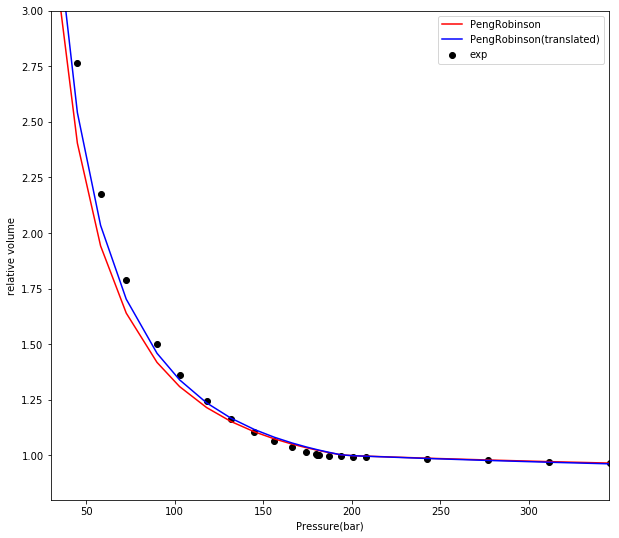

In [20]:
plt.plot(P,V,color='red')
plt.plot(P,Vcor,color='blue')
plt.scatter(P,vexp,color='black',)
plt.xlim([30, 345])
plt.ylim([0.8,3])
fig = plt.gcf()
fig.set_size_inches(10, 9)
plt.legend(['PengRobinson','PengRobinson(translated)','exp'])
plt.xlabel('Pressure(bar)')
plt.ylabel('relative volume')

In [25]:
print('average absolute deviation of translated PR from experimental data',np.average(100*(np.abs(vexp-Vcor)/vexp)),'%')

average absolute deviation of translated PR from experimental data 2.207415670429626 %


In [26]:
print('average absolute deviation of PR from experimental data',np.average(100*(np.abs(vexp-V)/vexp)),'%')

average absolute deviation of PR from experimental data 3.1950519986528008 %
